# About the Project

This project presents a comprehensive analysis of India's electric vehicle market, focusing on segmentation derived from sales data, customer reviews, and technical specifications.

In [1]:
#!pip install missingno
#!pip install vaderSentiment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

# Sales Data

The sales data obtained from the Society of Manufacturers of Electric Vehicles, spanning 2017 to 2024, catalogues sales figures of electric two-wheelers, three-wheelers, four-wheelers, and buses. This dataset provides a comprehensive view of market trends and customer preferences over time.

In [3]:
df1 = pd.read_excel("ev_sales_data.xlsx", sheet_name='Sheet1')
df1

,Category,17-18,18-19,19-20,20-21,21-22,22-23,23-24,Grand Total
0,E-2 Wheelers,2005,28007,26834,44803,252642,728054,944126,2026471
1,E-3 Wheelers,91970,116031,143051,90898,172543,401882,632485,1648860
2,E-4 Wheelers,1204,1885,2377,5154,18622,47499,90432,167173
3,E-Buses,19,66,434,373,1194,1984,3693,7763
4,Grand Total,95198,145989,172696,141228,445001,1179419,1670736,3850267


In [4]:
df = df1.iloc[:, :-1]
df

,Category,17-18,18-19,19-20,20-21,21-22,22-23,23-24
0,E-2 Wheelers,2005,28007,26834,44803,252642,728054,944126
1,E-3 Wheelers,91970,116031,143051,90898,172543,401882,632485
2,E-4 Wheelers,1204,1885,2377,5154,18622,47499,90432
3,E-Buses,19,66,434,373,1194,1984,3693
4,Grand Total,95198,145989,172696,141228,445001,1179419,1670736


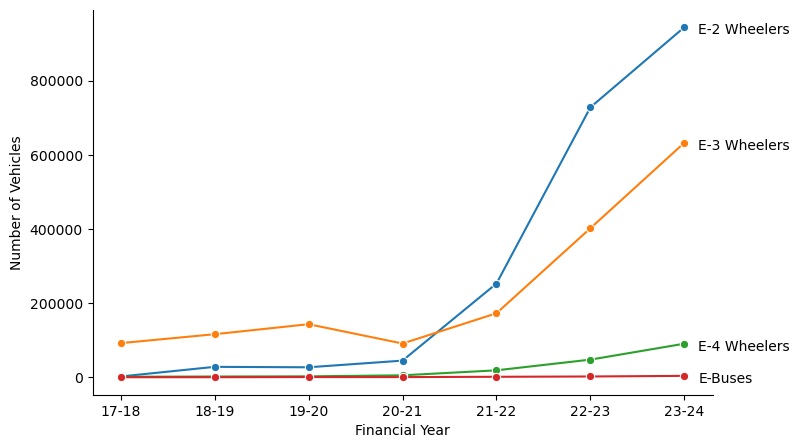

In [5]:
df = pd.DataFrame(df)

# Melt the DataFrame to make it long-form for seaborn
df_melted = df.melt(id_vars=["Category"], var_name="Financial Year", value_name="Number of Vehicles")

# Filter out the Grand Total row for the plot
df_filtered = df_melted[df_melted["Category"] != "Grand Total"]

# Create the line plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(data=df_filtered, x="Financial Year", y="Number of Vehicles", hue="Category", marker='o', palette='tab10')

# Set plot labels and legend
plt.xlabel("Financial Year")
plt.ylabel("Number of Vehicles")
plt.legend(title='Category')


# Annotate the last data point for each category
for category in df_filtered["Category"].unique():
    last_point = df_filtered[df_filtered["Category"] == category].iloc[-1]
    plt.annotate(f"{last_point['Category']}", 
                 (last_point["Financial Year"], last_point["Number of Vehicles"]),
                 textcoords="offset points", 
                 xytext=(10, -5), 
                 ha='left')

# Remove the right and top spines
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()

In [6]:
df2 = pd.read_excel('ev_sales_data.xlsx', sheet_name='Sheet2')
df2

,Category,Amount( in Crores)
0,E-2 Wheelers,2464.27
1,E-3 Wheelers,351.21
2,E-4 Wheelers,114.65
3,E-Buses,687.93


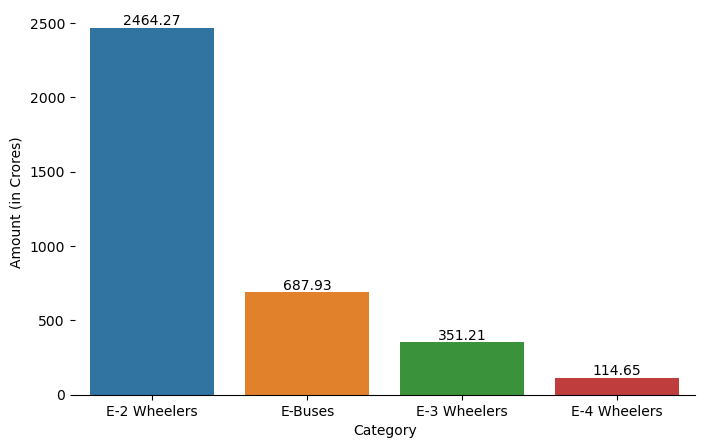

In [7]:
# Create the DataFrame
#data = {
#    "Category": ["E-2 Wheelers", "E-3 Wheelers", "E-4 Wheelers", "E-Buses"],
#    "Amount (in Crores)": [2464.27, 351.21, 114.65, 687.93]
#}

df = pd.DataFrame(df2)

# Sort the DataFrame by the amount column if needed
df_sorted = df.sort_values("Amount( in Crores)", ascending=False)

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=df_sorted, x='Category', y='Amount( in Crores)', palette='tab10')

# Add labels to each bar
ax.bar_label(ax.containers[0])

# Customize the plot
plt.ylabel("Amount (in Crores)")
plt.xlabel("Category")
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.show()

In [8]:
df3 = pd.read_excel('ev_sales_data.xlsx', sheet_name='Sheet3')
df3

,Company,2019-20,2020-21,2021-22,2022-23,2023-2024
0,OLA ELECTRIC,0,0,0,152779,326443
1,TVS,0,838,9740,82109,182959
2,ATHER,2905,4401,19981,76939,108872
3,BAJAJ,0,1470,7114,32805,106990
4,AMPERE,2518,6095,25516,87392,55057
5,OKINAWA,10544,7129,47926,95939,20873
6,HERO ELECTRIC,7865,15956,69235,89874,12094
7,OKAYA EV,0,0,0,13175,14035
8,REVOLT,1063,1793,7641,12932,7342
9,OTHERS,1939,3251,24865,52973,79622


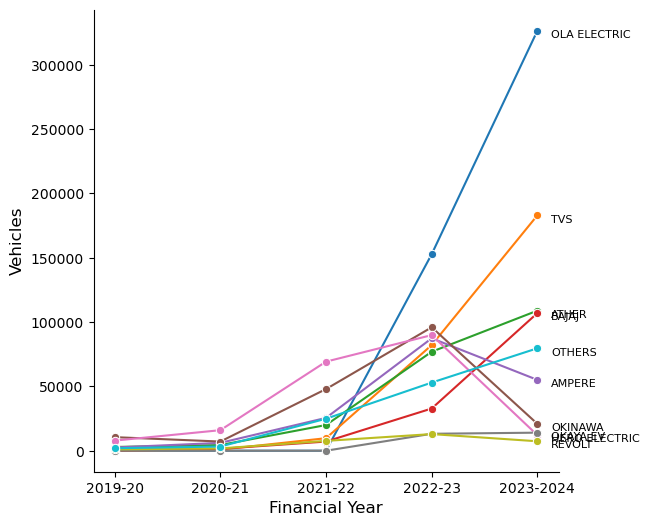

In [9]:
# Creating a DataFrame
df = pd.DataFrame(df3)

# Melt the DataFrame to long format for seaborn
df_melted = df.melt(id_vars='Company', var_name='financial_year', value_name='num_vehicles')

# Plotting the line plot using seaborn
plt.figure(figsize=(6, 6))
ax = sns.lineplot(data=df_melted, x='financial_year', y='num_vehicles', hue='Company', marker='o', palette='tab10')

# Adding labels and title
plt.xlabel("Financial Year", fontsize=12)
plt.ylabel("Vehicles", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Company')

# Annotate the last data point for each company
for company in df['Company']:
    last_point = df_melted[df_melted['Company'] == company].iloc[-1]
    plt.annotate(f"{last_point['Company']}",
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5),
                 ha='left', fontsize=8)

# Customizing the plot's appearance
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)


plt.show()

#### Above Figure honed in on specific electric two-wheeler companies, with Ola Electric emerging as the market leader in 2023, illustrating industry leadership and market competitiveness.

In [10]:
data_bw = pd.read_csv("ev2_bikewale.csv")
data_model = pd.read_csv("ev_model_spec.csv")
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


<Axes: >

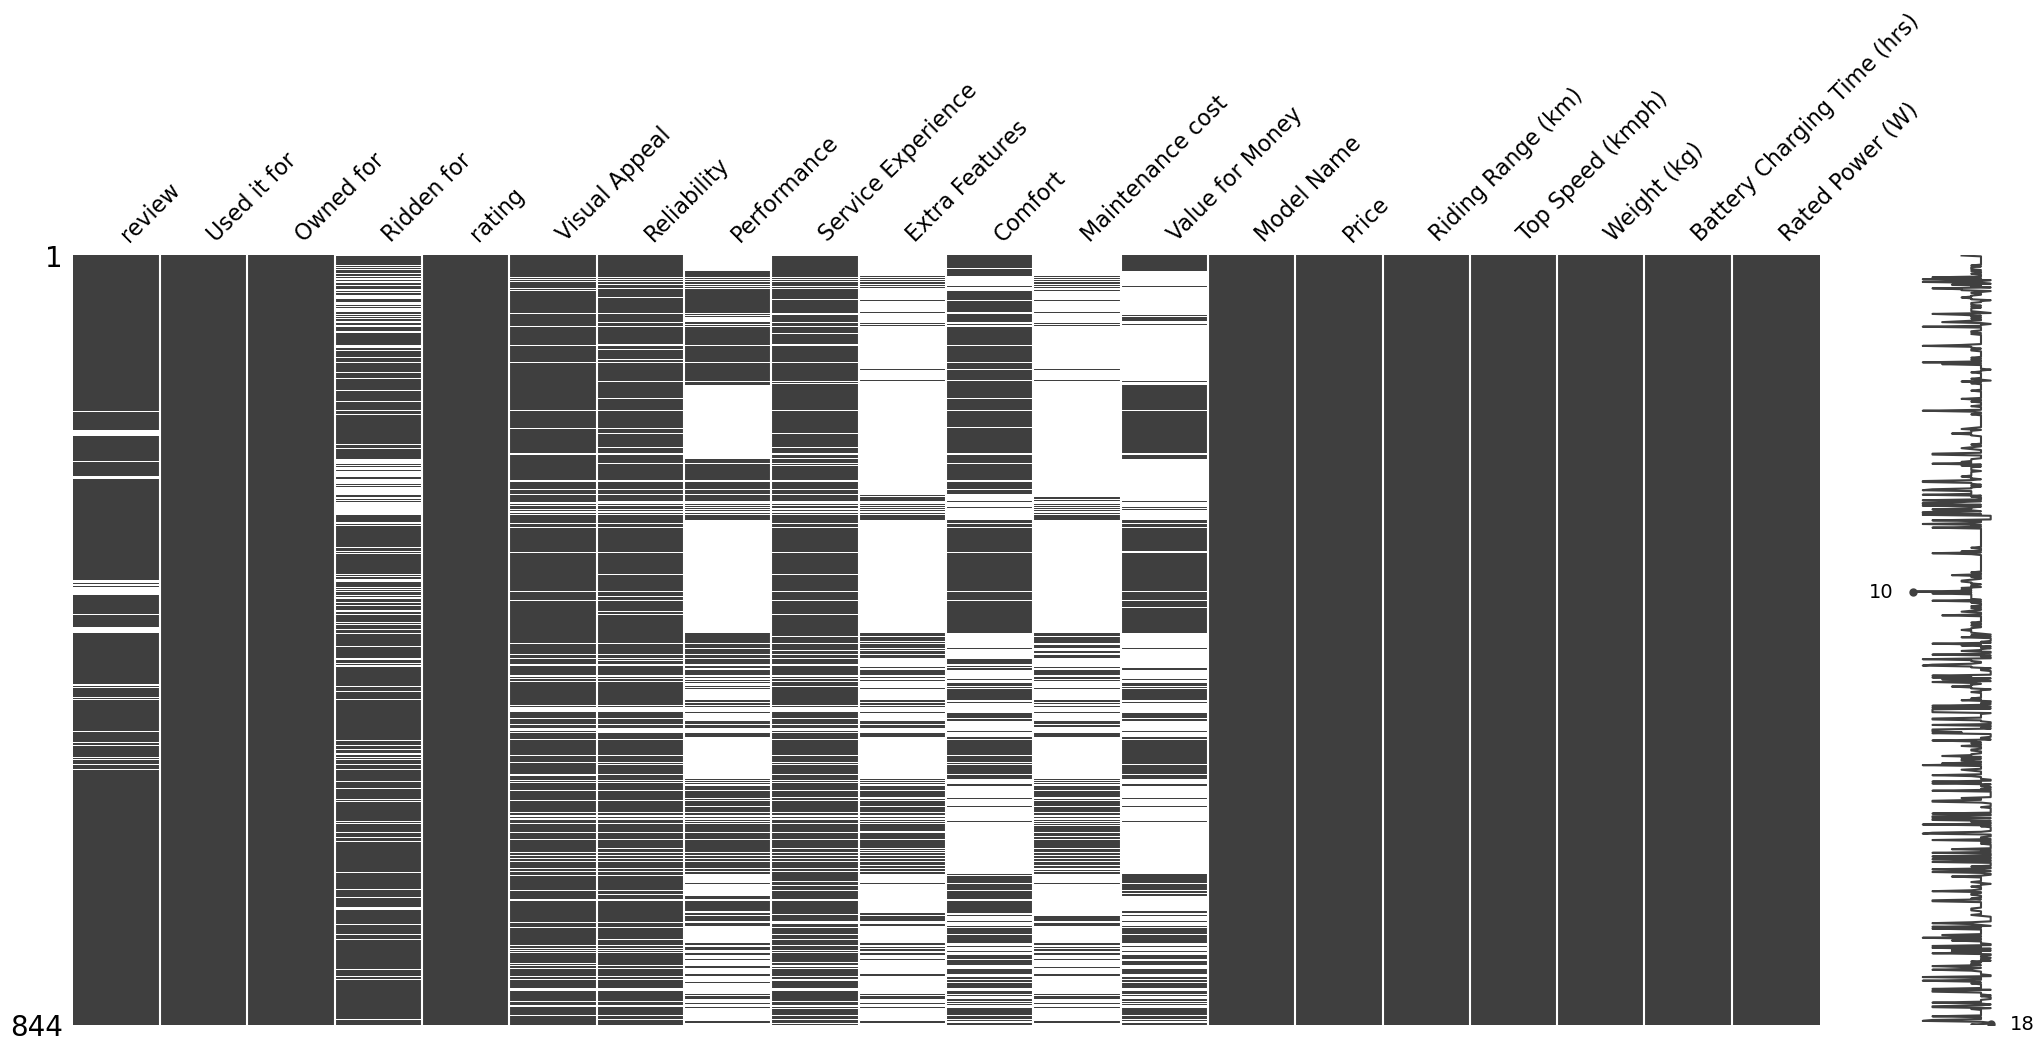

In [11]:
msno.matrix(data)

In [12]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [14]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)
    
data['sentiment'] = sentiments_list
data['sentiment'].value_counts()

positive    531
negative    260
neutral      53
Name: sentiment, dtype: int64

In [15]:
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment']].copy()
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [16]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative


In [17]:
data_segment = data.iloc[:, 5:13].copy()
data_segment = data_segment.fillna(0.)
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 59.3 KB


In [18]:
data_segment.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [20]:
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972


In [21]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [22]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


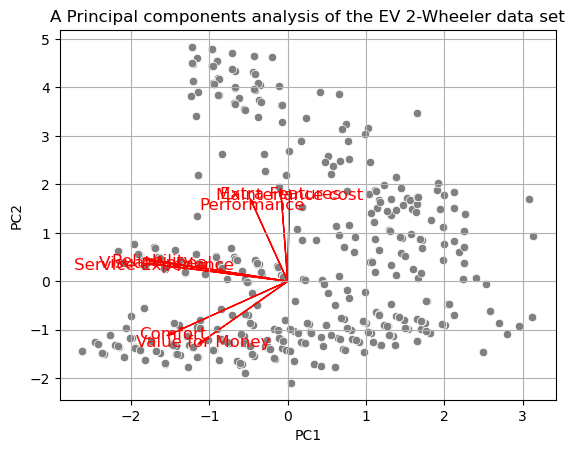

In [23]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')


# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
#plt.savefig("pca_2w.png", format = 'png')
plt.show()

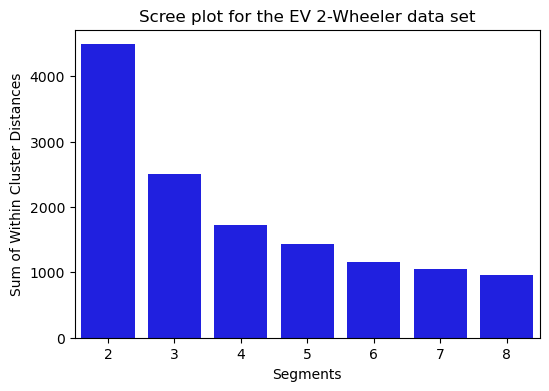

In [24]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]
wcss = [model.inertia_ for model in data_km28]
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'blue')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.savefig("scree_plot.png")
plt.show()

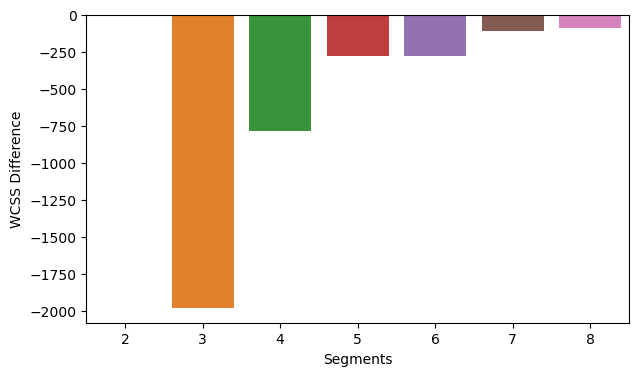

In [25]:
wcss_diff = pd.DataFrame({'Segments':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0
plt.figure(figsize = (7, 4))
sns.barplot(wcss_diff, x = 'Segments', y = 'WCSS Difference')
#plt.savefig("wcss_diff.png")
plt.show()

In [26]:
kmeans = data_km28[2]
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

# Profiling Segments

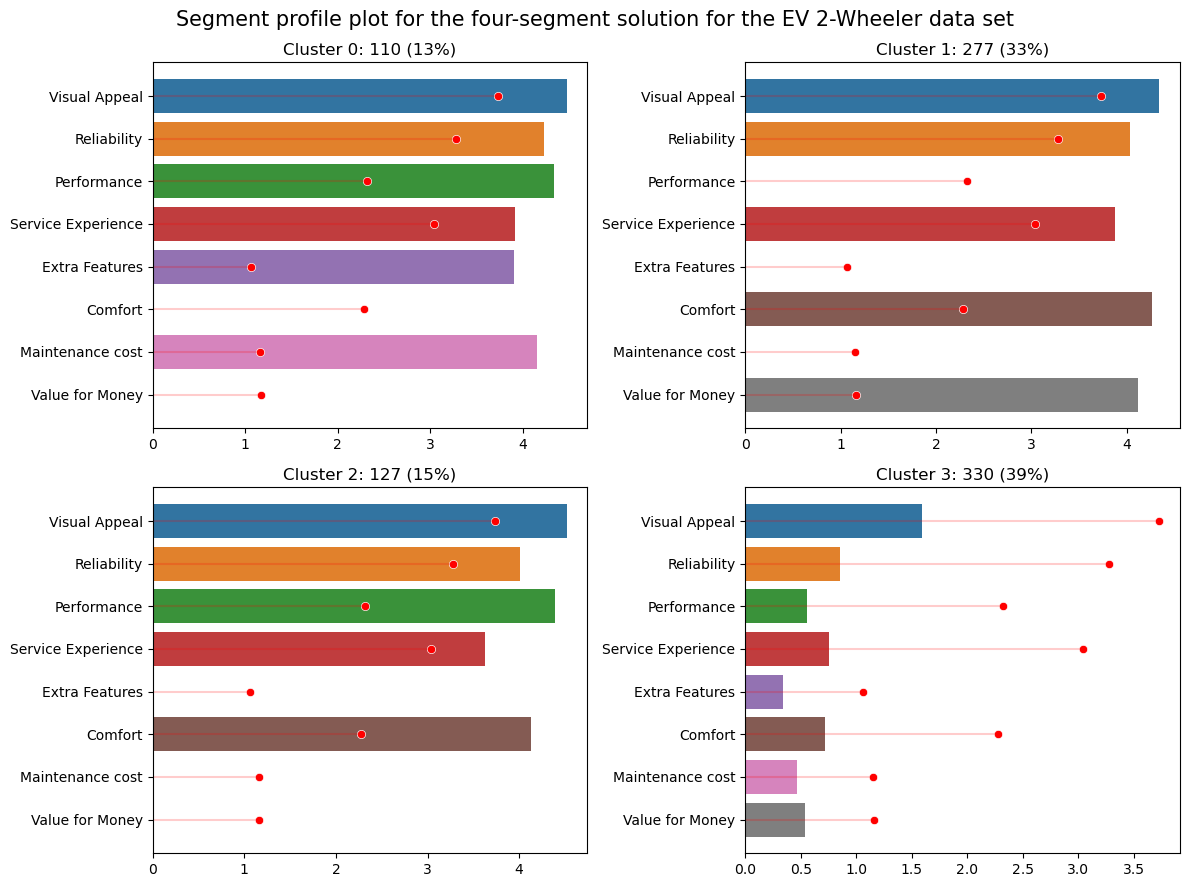

In [27]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.savefig("segment_profile.png")
plt.show()

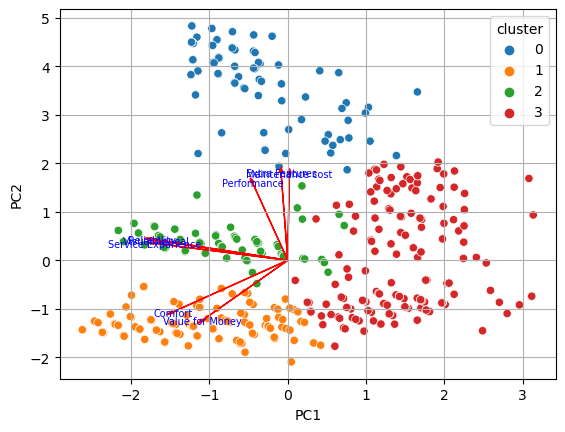

In [45]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=7, ha='center', color = 'blue', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.savefig("segment_separation.png")
plt.show()

# Describing Segments

In [29]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'cluster'],
      dtype='object')

In [30]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1,title = "Simple Mosaic Plot", xlabel = 'cat'):
    
    fig, ax = plt.subplots(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
        
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    

    # Configure title and axis
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()

In [31]:
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#E377C2']
sentiment_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['sentiment'])
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,16,0,94
1,26,41,210
2,11,4,112
3,207,8,115


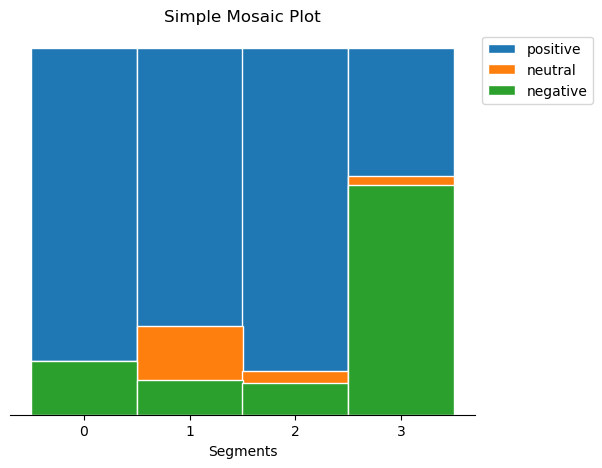

In [32]:
mosaicplot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1)

In [33]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,87,19,2,1,1
1,194,55,7,19,2
2,75,39,4,9,0
3,244,47,7,27,5


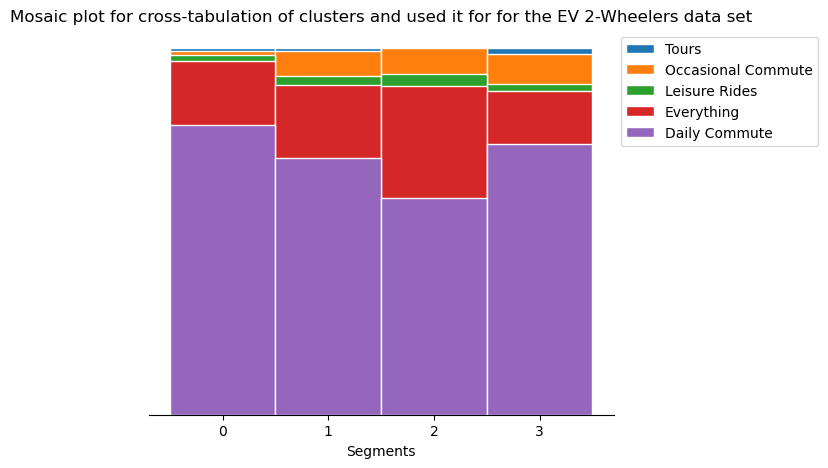

In [34]:
mosaicplot(used_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set' )

In [35]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])
owned_cluster = owned_cluster.iloc[:, :-1]
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned
cluster,,,,,
0,14,14,43,20,19
1,41,51,79,56,50
2,16,14,31,10,56
3,40,55,67,117,50


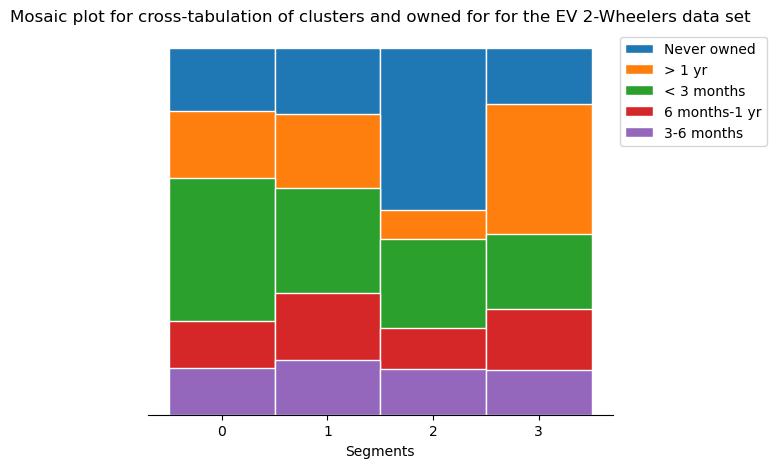

In [36]:
mosaicplot(owned_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set' )

In [37]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])
ridden_cluster=ridden_cluster.iloc[:, :-1]
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms
cluster,,,,
0,5,18,63,5
1,11,44,158,14
2,1,15,54,1
3,15,61,184,18


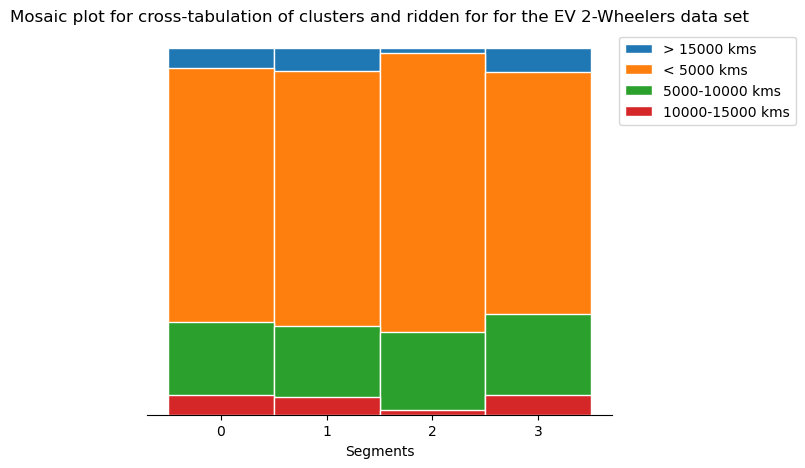

In [38]:
mosaicplot(ridden_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set' )

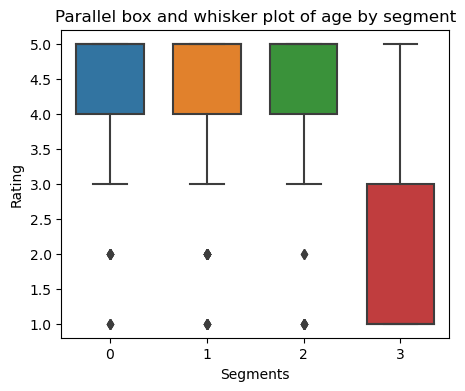

In [39]:
# Number of cluster along the x-axis and rating along the y-axis
plt.figure(figsize = (5,4))
sns.boxplot(data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.savefig("rating.png")
plt.show()

In [40]:
data_desc.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,1.0,TVS iQube,137890,100,78,117,5,3000,negative,3
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,3.0,TVS iQube,137890,100,78,117,5,3000,negative,3
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,2.0,TVS iQube,137890,100,78,117,5,3000,positive,1
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,1.0,TVS iQube,137890,100,78,117,5,3000,negative,3
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,2.0,TVS iQube,137890,100,78,117,5,3000,negative,1


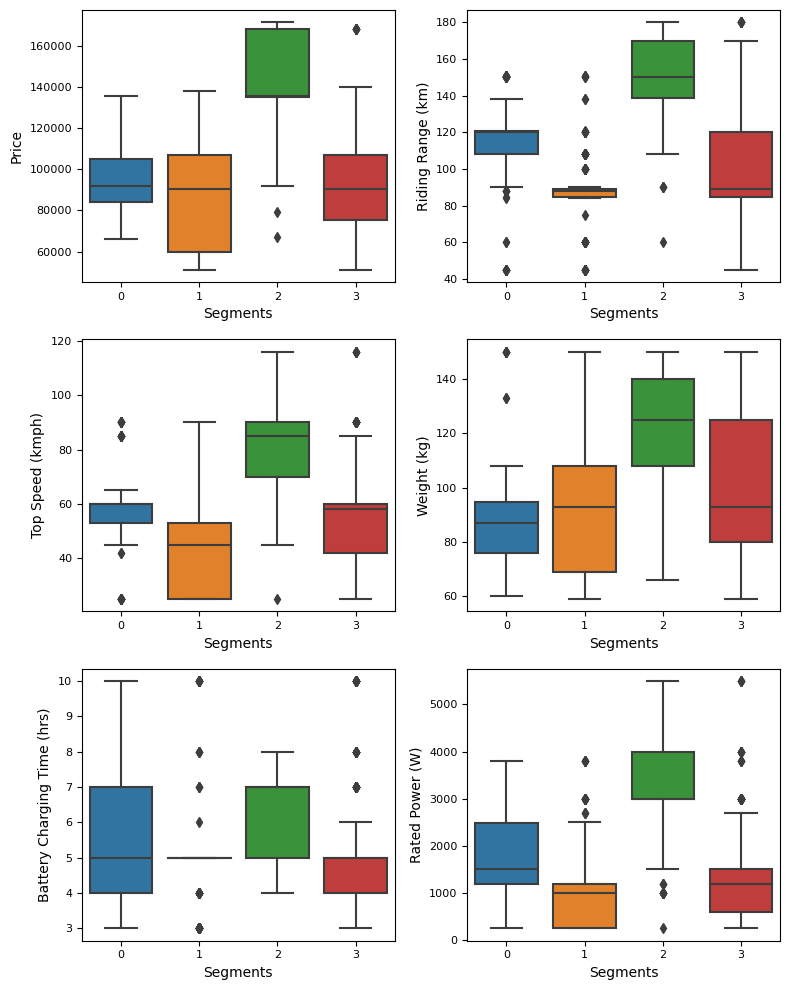

In [41]:
plt.figure(figsize = (8, 10))
for i, col in enumerate(data_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()